## Pillow, Scikit-image 를 이용한 이미지 처리

In [1]:
import PIL
PIL.__version__

'9.4.0'

### 이미지 읽고 쓰기

In [3]:
!wget -O logo.png https://www.python.org/static/community_logos/python-logo-master-v3-TM.png

--2024-02-13 19:16:27--  https://www.python.org/static/community_logos/python-logo-master-v3-TM.png
Resolving www.python.org (www.python.org)... 146.75.48.223
Connecting to www.python.org (www.python.org)|146.75.48.223|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 83564 (82K) [image/png]
Saving to: ‘logo.png’

logo.png            100%[===================>]  81.61K  --.-KB/s    in 0.08s   

2024-02-13 19:16:27 (1.03 MB/s) - ‘logo.png’ saved [83564/83564]



Pillow 패키지에서 제공하는 Image 클래스를 사용하면 여러가지 다양한 포맷의 이미지를 읽고 변환하여 저장할 수 있다.

In [4]:
from PIL import Image
img_logo_png = Image.open("./logo.png")
img_logo_png.size

(601, 203)

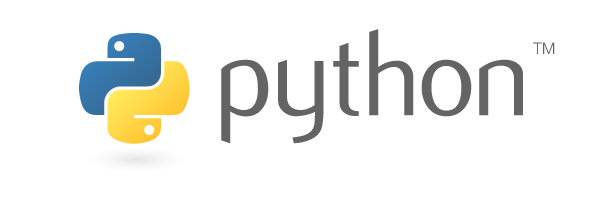

In [5]:
img_logo_png

파일로 저장할 때는 save 메서드를 사용한다. 이 때 확장자를 지정하면 해당 이미지 형식으로 자돵 변환하여 저장한다.

In [ ]:
img_logo_png.save("./logo.bmp")
img_logo_bmp = Image.open("./logo.bmp")

이미지 데이터 처리를 위해 Image 클래스 객체를 Numpy 배열로 변환할 때는 np.array 함수를 사용한다.  
Numpy 배열이 되면 matplotlib의 imshow 명령으로 볼 수 있다.

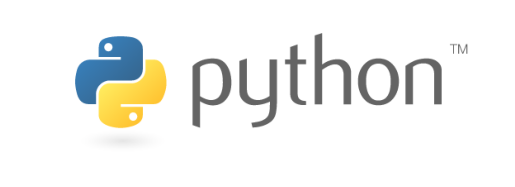

In [7]:
import numpy as np
import matplotlib.pyplot as plt

img_logo_array = np.array(img_logo_bmp)
plt.imshow(img_logo_array)
plt.axis("off")
plt.show()

반대로 Numpy 배열을 Image 객체로 바꿀 때는 fromarray 클래스 메서드를 사용한다.

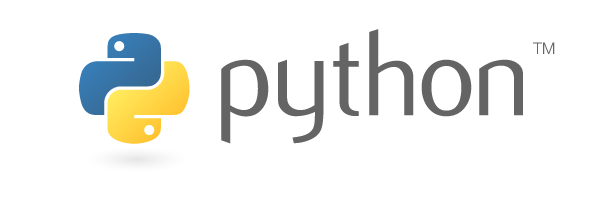

In [8]:
Image.fromarray(img_logo_array)

### 이미지 크기 변환
이미지의 크기를 확대 또는 축소하려면 resize 메서드를 활용한다. 인수로는 새로운 사이즈의 튜플을 입력한다.

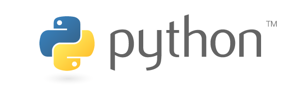

In [9]:
img_logo_png2 = img_logo_png.resize((300, 100))
img_logo_png2

썸네일 이미지를 만들고 싶다면 Image객체의 thumbnail 메서드를 사용한다.  
resize 메서드는 원래 객체는 그대로 유지한 채 변환된 이미지를 반환하지만 thumbnail 메서드는 원래 객체 자체를 바꾸는 인플레이스 메서드이므로 주의하여 사용한다.

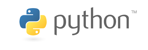

In [10]:
img_logo_thumbnail = img_logo_png.copy()
img_logo_thumbnail.thumbnail((150, 50))
img_logo_thumbnail

### 이미지 회전
이미지를 회전하기 위해서는 rotate 메서드를 호출한다. 인수로는 도(degree) 단위의 각도를 입력한다. 입력 각도만큼 반시계 방향으로 회전한다.

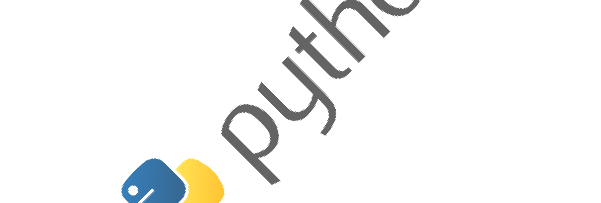

In [11]:
img_logo_rotated = img_logo_png.rotate(45)
img_logo_rotated

### 이미지 잘라내기
crop 메서드를 사용하면 이미지에서 우리가 관심이 있는 특정 부분(ROI: region of interest) 만 추출할 수 있다. 인수로 ROI의 좌-상의 좌표, 우-하의 좌표를 받는다. 아래의 코드는 파이썬 로고이미지에서 파이썬의 마크만 잘라낸 것이다.

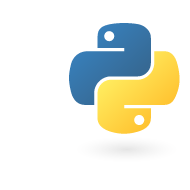

In [12]:
img_logo_cropped = img_logo_png.crop((10, 10, 200, 200))
img_logo_cropped

scikit-image 패키지도 이미지 처리에 많이 사용된다.

In [14]:
import skimage
skimage.__version__

'0.22.0'

### 샘플 이미지
Scikit-Image 는 data라는 모듈을 통해 샘플 이미지 데이터를 제공한다. 이미지는 Numpy 배열 자료형으로 사용한다.

In [15]:
import skimage.data
img_astro = skimage.data.astronaut()
img_astro.shape

(512, 512, 3)

## 이미지 읽고 쓰기
Scikit-Image 패키지로 이미지를 읽고 쓸 때는 io 서브패키지의 imsave, imread 명령을 사용한다. 파일 확장자를 지정하면 해당 이미지 형식으로 자동 변환한다.

In [18]:
skimage.io.imsave("astronaut.png", img_astro)
img_astro2 = skimage.io.imread("astronaut.png")

### 색공간 변환
Scikit-Image는 그레이스케일, RGB, HSV 등의 색공간을 변환하는 기능을 color 서브패키지에서 제공한다.

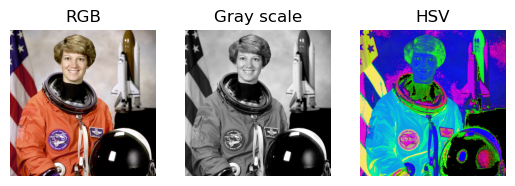

In [21]:
from skimage import color

plt.subplot(131)
plt.imshow(img_astro)
plt.axis("off")
plt.title("RGB")

plt.subplot(132)
plt.imshow(color.rgb2gray(img_astro), cmap=plt.cm.gray)
plt.axis("off")
plt.title("Gray scale")

plt.subplot(133)
plt.imshow(color.rgb2hsv(img_astro))
plt.axis("off")
plt.title("HSV")

plt.show()